In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import cv2
import os
from tqdm import tqdm

DATADIR =  r"C:\Users\chanu\Desktop\covid images"
CATEGORIES = {'COVID':0, 'non-COVID':1}
IMG_SIZE=100

In [4]:
x = []
y = []

for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        img_array=cv2.resize(img_array, (100,100))
        dst = cv2.fastNlMeansDenoisingColored(img_array,None,10,10,7,21)
        x.append(img_array)
        y.append(CATEGORIES[category])

In [5]:
 np.unique(y)

array([0, 1])

In [6]:
x = np.array(x)
y = np.array(y)

In [7]:
x[0].shape

(100, 100, 3)

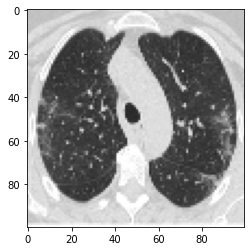

In [8]:
plt.imshow(x[0], cmap='gray')

In [9]:
x_updated = x.reshape(len(x), -1)
x_updated.shape

(2481, 30000)

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(x_updated, y, random_state=10,test_size=0.20)

In [12]:
#feature selection pca
from sklearn.decomposition import PCA

In [11]:
xtrain.shape, xtest.shape

((1984, 30000), (497, 30000))

In [26]:
#feature scaling
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [13]:
print(xtrain.shape, xtest.shape)
pca = PCA(0.98)
pca_train = xtrain
pca_test =  xtest 

(1984, 30000) (497, 30000)


In [14]:
#train model 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor

In [17]:
regressor = RandomForestRegressor(n_estimators=30, random_state=0)
regressor.fit(xtrain, ytrain)

RandomForestRegressor(n_estimators=30, random_state=0)

In [16]:
print("Training score:", regressor.score(xtrain, ytrain))
print("Testing Score:", regressor.score(xtest, ytest))

Training score: 0.9337604683307585
Testing Score: 0.6239622603316493


In [18]:
|pred = regressor.predict(xtest)
np.where(ytest!=pred)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 120, 121, 123, 124, 125, 126, 127, 128, 129, 130, 131,
        132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 144, 145,
        147, 148, 149, 150, 152, 154, 155, 156, 157, 158, 159, 160, 161,
        162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174,
        175, 176, 177, 178, 179, 180, 181, 183, 184

In [20]:
result = pd.DataFrame({'original' : ytest,'predicted' : pred})
result

,original,predicted
0,0,0.200000
1,0,0.133333
2,0,0.133333
3,0,0.133333
4,1,0.700000
...,...,...
492,1,0.900000
493,0,0.066667
494,0,0.133333
495,1,0.566667


In [22]:
svc = SVC(kernel='rbf',random_state = 0)
svc.fit(xtrain, ytrain)

SVC(random_state=0)

In [23]:
print("Training score:", svc.score(xtrain, ytrain))
print("Testing Score:", svc.score(xtest, ytest))

Training score: 0.9440524193548387
Testing Score: 0.8933601609657947


In [24]:
pred1 = svc.predict(xtest)
np.where(ytest!=pred1)

(array([ 13,  20,  23,  33,  43,  69,  76,  85,  86,  87,  99, 101, 105,
        136, 149, 155, 166, 167, 170, 171, 173, 176, 185, 196, 206, 238,
        246, 248, 249, 251, 272, 276, 281, 284, 285, 293, 321, 335, 338,
        349, 362, 364, 394, 397, 400, 421, 424, 433, 447, 451, 474, 476,
        486], dtype=int64),)

In [28]:
from sklearn.metrics import accuracy_score
print("Accuracy on data is",accuracy_score(ytest,pred1))

Accuracy on data is 0.8933601609657947


In [30]:
result = pd.DataFrame({'original' : ytest,'predicted' : pred1})
result

,original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
492,1,1
493,0,0
494,0,0
495,1,1


In [31]:
from sklearn.metrics import classification_report
print("Accuracy on  data is",classification_report(ytest,pred1))

Accuracy on  data is               precision    recall  f1-score   support

           0       0.92      0.86      0.89       248
           1       0.87      0.93      0.90       249

    accuracy                           0.89       497
   macro avg       0.90      0.89      0.89       497
weighted avg       0.90      0.89      0.89       497



In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, pred1)

array([[213,  35],
       [ 18, 231]], dtype=int64)

In [53]:

KNN = KNeighborsClassifier()
KNN.fit(xtrain, ytrain)

KNeighborsClassifier()

In [54]:
print("Training score:", KNN.score(xtrain, ytrain))
print("Testing Score:", KNN.score(xtest, ytest))

Training score: 0.9450604838709677
Testing Score: 0.8893360160965795


In [61]:
pred2 = KNN.predict(xtest)
np.where(ytest!=pred2)

(array([  7,  23,  33,  43,  53,  59,  68,  80,  99, 112, 136, 144, 147,
        151, 158, 166, 171, 173, 176, 185, 195, 196, 206, 246, 248, 249,
        266, 269, 272, 275, 277, 284, 301, 302, 315, 321, 330, 335, 338,
        346, 355, 358, 364, 380, 381, 390, 391, 394, 400, 420, 433, 434,
        465, 474, 482], dtype=int64),)

In [62]:
from sklearn.metrics import accuracy_score
print("Accuracy on data is",accuracy_score(ytest,pred2))

Accuracy on data is 0.8893360160965795


In [64]:
result = pd.DataFrame({'original' : ytest,'predicted' : pred2})
result

,original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
492,1,1
493,0,0
494,0,0
495,1,1


In [65]:
from sklearn.metrics import classification_report
print("Accuracy on  data is",classification_report(ytest,pred2))

Accuracy on  data is               precision    recall  f1-score   support

           0       0.89      0.89      0.89       248
           1       0.89      0.89      0.89       249

    accuracy                           0.89       497
   macro avg       0.89      0.89      0.89       497
weighted avg       0.89      0.89      0.89       497



In [66]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, pred2)

array([[220,  28],
       [ 27, 222]], dtype=int64)

In [67]:
CART = DecisionTreeClassifier()
CART.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [68]:
print("Training score:", CART.score(xtrain, ytrain))
print("Testing Score:", CART.score(xtest, ytest))

Training score: 1.0
Testing Score: 0.7565392354124748


In [71]:
pred3 = CART.predict(xtest)
np.where(ytest!=pred3)

(array([ 17,  22,  28,  35,  44,  46,  47,  51,  54,  58,  66,  67,  69,
         73,  75,  78,  83,  86,  87,  89,  94,  98, 100, 101, 103, 104,
        131, 136, 138, 141, 145, 149, 150, 155, 156, 157, 164, 170, 171,
        175, 178, 183, 184, 186, 188, 190, 194, 202, 204, 209, 210, 212,
        220, 224, 226, 228, 230, 232, 238, 242, 246, 247, 250, 252, 258,
        260, 261, 262, 268, 272, 281, 284, 291, 293, 296, 304, 306, 313,
        314, 317, 323, 324, 332, 334, 336, 346, 349, 355, 364, 371, 372,
        374, 381, 389, 390, 392, 397, 401, 403, 406, 413, 421, 425, 427,
        430, 432, 443, 450, 456, 459, 460, 467, 470, 473, 474, 476, 485,
        486, 489, 495, 496], dtype=int64),)

In [72]:
from sklearn.metrics import accuracy_score
print("Accuracy on data is",accuracy_score(ytest,pred3))

Accuracy on data is 0.7565392354124748


In [73]:
result = pd.DataFrame({'original' : ytest,'predicted' : pred3})
result

,original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
492,1,1
493,0,0
494,0,0
495,1,0


In [74]:
from sklearn.metrics import classification_report
print("Accuracy on  data is",classification_report(ytest,pred3))

Accuracy on  data is               precision    recall  f1-score   support

           0       0.76      0.75      0.75       248
           1       0.75      0.76      0.76       249

    accuracy                           0.76       497
   macro avg       0.76      0.76      0.76       497
weighted avg       0.76      0.76      0.76       497



In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, pred3)

array([[186,  62],
       [ 59, 190]], dtype=int64)

In [82]:


NB = GaussianNB()
NB.fit(xtrain, ytrain)

GaussianNB()

In [83]:
print("Training score:", NB.score(xtrain, ytrain))
print("Testing Score:", NB.score(xtest, ytest))

Training score: 0.7298387096774194
Testing Score: 0.7464788732394366


In [84]:
pred4 = NB.predict(xtest)
np.where(ytest!=pred4)

(array([  1,   2,  23,  33,  39,  43,  46,  51,  54,  56,  58,  64,  70,
         76,  77,  80,  85,  87,  89,  99, 101, 109, 115, 122, 123, 133,
        138, 139, 143, 145, 150, 152, 155, 164, 166, 168, 171, 175, 176,
        180, 181, 185, 189, 190, 194, 195, 199, 206, 215, 220, 223, 224,
        227, 229, 232, 233, 238, 246, 248, 249, 251, 261, 266, 267, 268,
        272, 278, 281, 284, 286, 293, 297, 306, 316, 317, 321, 324, 327,
        331, 332, 335, 336, 338, 340, 353, 359, 362, 364, 365, 371, 372,
        384, 393, 397, 398, 399, 409, 413, 414, 418, 421, 424, 429, 433,
        434, 435, 436, 445, 446, 447, 451, 454, 456, 458, 459, 460, 464,
        471, 474, 476, 486, 488, 491, 493, 494, 496], dtype=int64),)

In [85]:
from sklearn.metrics import accuracy_score
print("Accuracy on data is",accuracy_score(ytest,pred4))

Accuracy on data is 0.7464788732394366


In [87]:
result = pd.DataFrame({'original' : ytest,'predicted' : pred4})
result

,original,predicted
0,0,0
1,0,1
2,0,1
3,0,0
4,1,1
...,...,...
492,1,1
493,0,1
494,0,1
495,1,1


In [88]:
from sklearn.metrics import classification_report
print("Accuracy on  data is",classification_report(ytest,pred4))

Accuracy on  data is               precision    recall  f1-score   support

           0       0.87      0.58      0.70       248
           1       0.69      0.91      0.78       249

    accuracy                           0.75       497
   macro avg       0.78      0.75      0.74       497
weighted avg       0.78      0.75      0.74       497



In [89]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, pred4)

array([[144, 104],
       [ 22, 227]], dtype=int64)